In [2]:
#수업과는 별개로 threading함수에 대한 설명
import threading

cnt = 0

def count():
    global cnt
    cnt += 1
    if cnt < 5:
        print("일정 시간 반복", cnt)
        threading.Timer(1, count).start()    #(1초 후에, count를).시작
        #start안하면 한번만 출력하고 끝난다. 아마 Timer함수가 start까지 해야되는듯
    else:
        print("일정 시간 반복 종료")

count()

일정 시간 반복 1


UCI 머신러닝 저장소  
머신러닝 공부에 필요한 각종 데이터를 모아 놓은 사이트  
https://archive.ics.uci.edu/ml/index.php

In [4]:
#피마 인디언 당뇨병 예측 코드 작성해보기
#0. 사용할 패키지 불러오기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#랜덤시드 고정시키기
np.random.seed(5)

#1. 데이터 준비하기
dataset =  np.loadtxt("/pima-indians-diabetes.csv", delimiter=",", dtype=np.float32)

#2. 데이터셋 생성하기
x_train = dataset[:700, 0:8]
y_train = dataset[:700, 8]
x_test = dataset[700:, 0:8]
y_test = dataset[700:, 8]

#3. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))#히든레이어 1. 입력 8, 노드 12
model.add(Dense(8, activation='relu'))#히든레이어 2. 노드 8
model.add(Dense(1, activation='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#accuracy를 모니터링
#model.summary()    #테스트?하는거라 실제 학습에는 영향을 미치지 않으니까 여기서는 안써도 문제없음
                    #하지만 사용하는 습관을 들이는건 좋음

#5. 모델 학습시키기
model.fit(x_train, y_train, epochs=1500, batch_size=64)

#6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))#names[0]은 loss, 1은 accuracy
#매트릭스상에 loss는 기본으로 나오고 그 다음에 내가 accuracy를 나오게 했으니까

Epoch 1/1500
11/11 [==============================] - 1s 2ms/step - loss: 4.0844 - accuracy: 0.4900
Epoch 2/1500
11/11 [==============================] - 0s 1ms/step - loss: 3.3140 - accuracy: 0.3700
Epoch 3/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.8726 - accuracy: 0.3929
Epoch 4/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.5480 - accuracy: 0.4457
Epoch 5/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.2757 - accuracy: 0.4343
Epoch 6/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.9991 - accuracy: 0.4200
Epoch 7/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.7662 - accuracy: 0.4357
Epoch 8/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.5489 - accuracy: 0.4286
Epoch 9/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.3122 - accuracy: 0.4343
Epoch 10/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.0445 - accuracy: 0.4543

In [6]:
#pandas를 사용해 데이터 불러오기
import pandas as pd
df = pd.read_csv("/pima-indians-diabetes.csv",
                names = ["pregnant", "plasma", "pressure", "thickness",
                        "insulin", "BMI", "pedigree", "age", "class"])
#read_csv 함수로 csv데이터 불러왔다
#원래 csv에는 헤더라 있지만, 우리가 가지고 있는 csv 파일에는 헤더가 없다.
#그래서 names를 이용해 각 속성별 키워드 지정해줬다.
print(df)

     pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0           6     148        72         35        0  33.6     0.627   50      1
1           1      85        66         29        0  26.6     0.351   31      0
2           8     183        64          0        0  23.3     0.672   32      1
3           1      89        66         23       94  28.1     0.167   21      0
4           0     137        40         35      168  43.1     2.288   33      1
..        ...     ...       ...        ...      ...   ...       ...  ...    ...
763        10     101        76         48      180  32.9     0.171   63      0
764         2     122        70         27        0  36.8     0.340   27      0
765         5     121        72         23      112  26.2     0.245   30      0
766         1     126        60          0        0  30.1     0.349   47      1
767         1      93        70         31        0  30.4     0.315   23      0

[768 rows x 9 columns]


In [7]:
print(df.head(5))    #키워드가 맞게 들어갔는지 보고 싶을때 처음 5개의 데이터만 보여줌

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [8]:
print(df.info())    #데이터의 전반적인 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
print(df.describe())    #정보별 특징을 좀 더 자세히 알고 싶으면 describe()함수를 사용

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [10]:
print(df[['pregnant','class']])#중간에 일부 데이터만 보고 싶을때(임신횟수, 당뇨병여부)
#데이터끼리의 상관관계를 확인할때 쓰인다
#여기서는 임신횟수가 많으면 당뇨에 걸리는지 확인할 수 있다

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [11]:
#앞서 살펴본 임신 횟수(pregnant)와 당뇨병 발병 확률(class)을 계산하는 법
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant',
                                                                                       ascending=True))
#모두 세가지 함수가 사용
#groupcy함수를

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


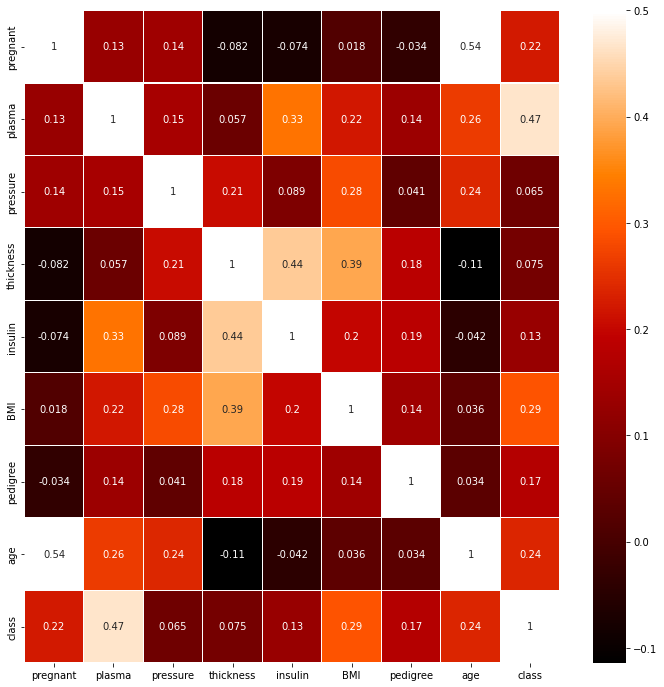

In [12]:
#위의 인디언 자료를 그래프로 표현하기 위해
import matplotlib.pyplot as plt#파이썬에서 그래프를 그릴때 가장 많이 사용되는 라이브러리
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
# df.corr : 각 변수간의 상관관계(여기서는 데이터)

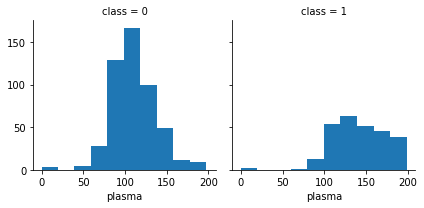

In [13]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [15]:
#인디언 당뇨병 예측 정확도 높이기 위한 여러가지 시도해보기
#0. 사용할 패키지 불러오기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#랜덤시드 고정시키기
np.random.seed(5)

#1. 데이터 준비하기
dataset =  np.loadtxt("/pima-indians-diabetes.csv", delimiter=",", dtype=np.float32)

#2. 데이터셋 생성하기
x_train = dataset[:700, 0:8]
y_train = dataset[:700, 8]
x_test = dataset[700:, 0:8]
y_test = dataset[700:, 8]

#3. 모델 구성하기
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))#히든레이어 1. 입력 8, 노드 12
model.add(Dense(16, activation='relu'))#히든레이어 2. 노드 8
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#accuracy를 모니터링
#model.summary()    #테스트?하는거라 실제 학습에는 영향을 미치지 않으니까 여기서는 안써도 문제없음
                    #하지만 사용하는 습관을 들이는건 좋음

#5. 모델 학습시키기
model.fit(x_train, y_train, epochs=1000, batch_size=64)

#6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))#names[0]은 loss, 1은 accuracy
#매트릭스상에 loss는 기본으로 나오고 그 다음에 내가 accuracy를 나오게 했으니까

Epoch 1/1000
11/11 [==============================] - 0s 2ms/step - loss: 22.4936 - accuracy: 0.3443
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 13.5977 - accuracy: 0.3443
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 8.2323 - accuracy: 0.3443
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 4.0913 - accuracy: 0.3429
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 1.6847 - accuracy: 0.4471
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.5486
Epoch 7/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.6029
Epoch 8/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.7565 - accuracy: 0.6071
Epoch 9/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.6186
Epoch 10/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.61

In [17]:
#다중 분류 문제 해결하기
#activation = softway
import pandas as pd
df = pd.read_csv("/iris.csv",
                  names = ["sepal_length","sepal_width","petal_length","petal_width","species"])
print(df.head())    #갯수 생략하면 5개가 기본값으로 나온다
#sepal : 꽃받침
#petal : 꽃잎

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


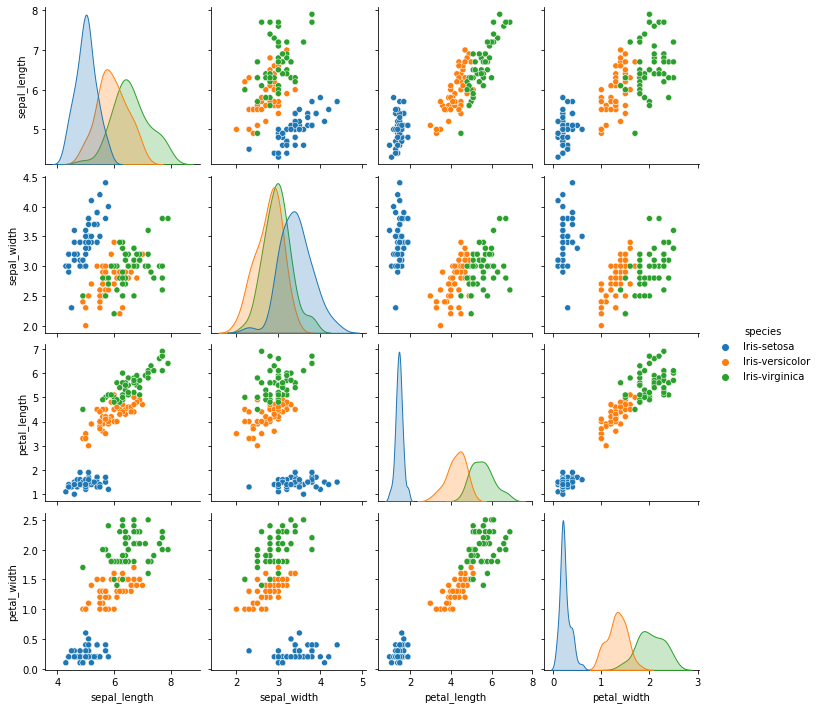

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

In [19]:
#원-핫 인코딩
my_list = ['a', 'b', 'c', 'a', 'b', 'c']
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
my_list = labelencoder.fit_transform(my_list)
print(my_list)

[0 1 2 0 1 2]


In [20]:
my_list = ['aa', 'bb', 'cc', 'a', 'b', 'cc']#알파벳 순서로, 그다음엔 문자열길이로 순서(번호)를 준다
                                            #순서(번호) : a(0), aa(1), b(2), bb(3), cc(4)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
my_list = labelencoder.fit_transform(my_list)
print(my_list)

[1 3 4 0 2 4]


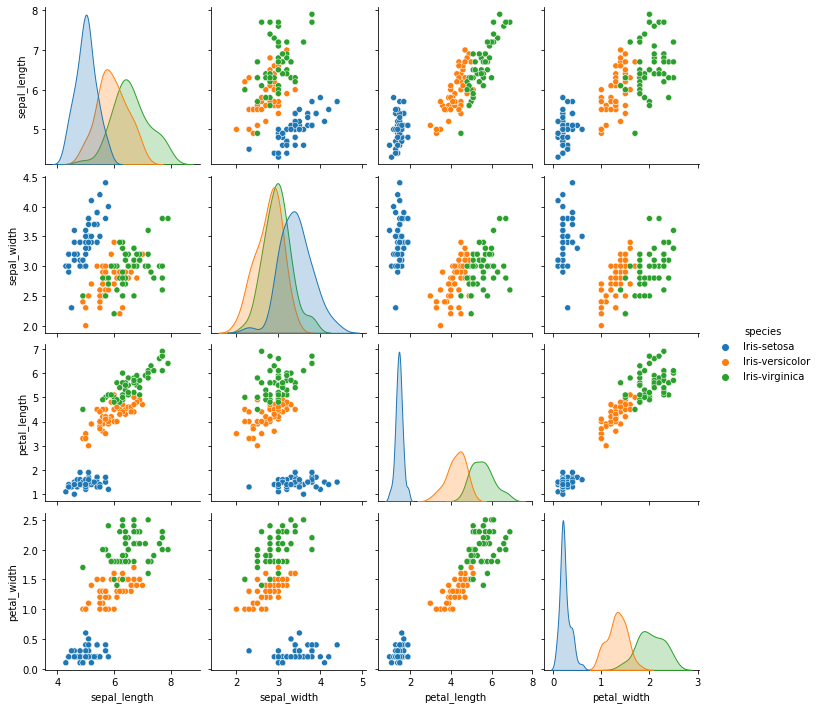

Epoch 1/50
150/150 [==============================] - 0s 1ms/step - loss: 1.6271 - accuracy: 0.5533
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7000
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.7733
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.8200
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8133
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8867
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.9000
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8933
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.9067
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.9733

In [22]:
#아이리스 품종 예측하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder    #자연어처리를 위해 사이킷런 다운

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df = pd.read_csv("/iris.csv",
                  names = ["sepal_length","sepal_width","petal_length","petal_width","species"])

#그래프로 확인
sns.pairplot(df, hue='species')
plt.show()

#데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)    #속성
Y_obj = dataset[:, 4]    #클래스

#문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

#모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

#모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#모델 실행
model.fit(X, Y_encoded, epochs = 50, batch_size = 1)

#결과 출력
print("\n Accuracy : %.4f" % (model.evaluate(X, Y_encoded)[1]))